# Amazonの食品レビューの二部グラフ

対応する動画：[NetworkXを使って実データから二部グラフの可視化【研究で使うPython #30】](https://youtu.be/2a7VbUa3Ysk)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import networkx as nx

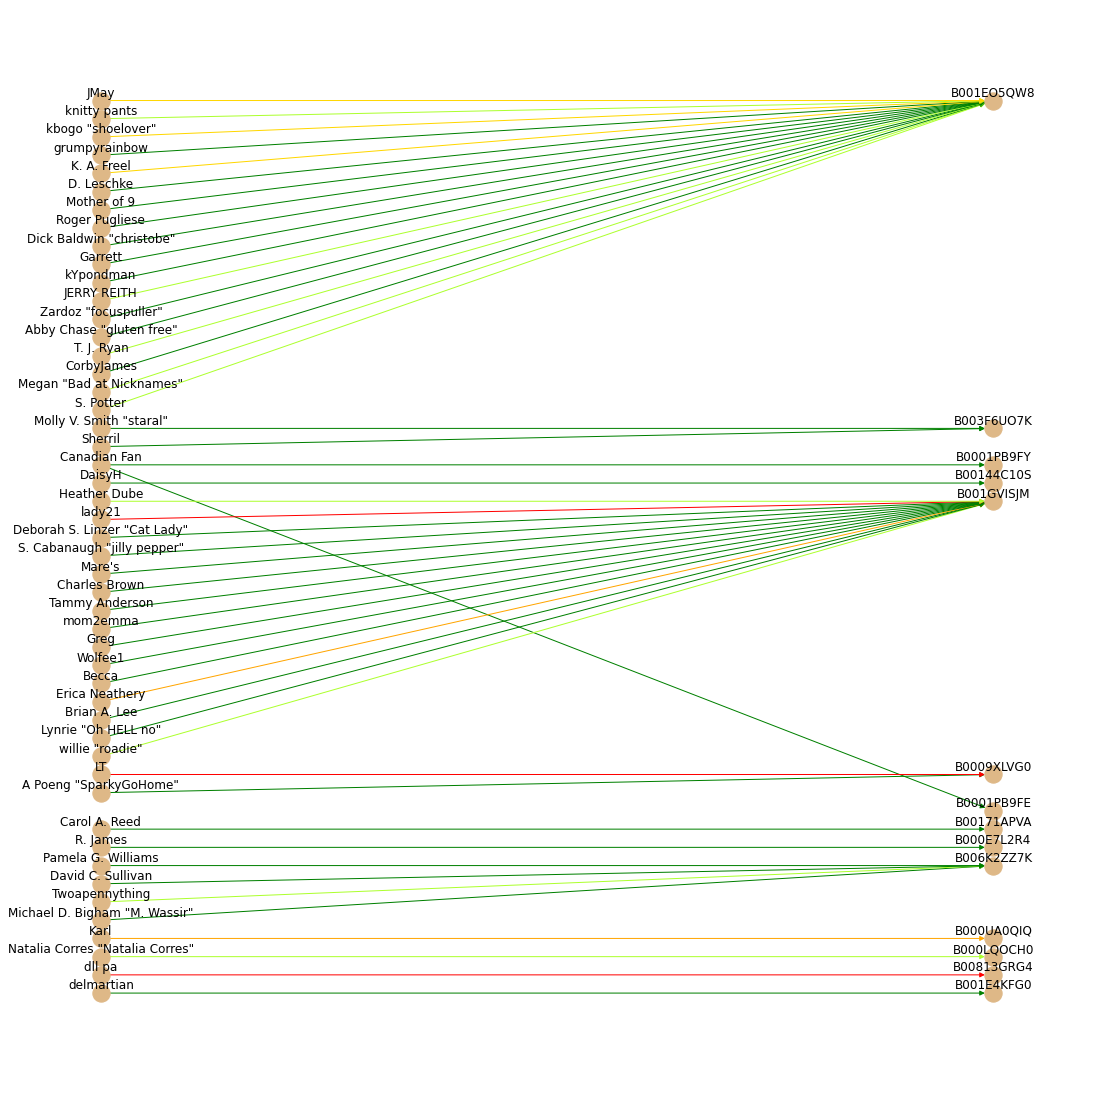

In [2]:
R = 50  # 読み込むレビューの数(最大100)

foods=[]    # 食品名を入れるためのリスト
users=[]    # ユーザ名を入れるためのリスト
colorlist=['red','orange','gold','greenyellow','green']  # 色で評価を表す（低いほど赤、高いほど緑に近づく）

# 空の有向グラフ生成
G = nx.DiGraph()

with open("foods.txt", "r") as f:
    lines = f.readlines()
    
    for i in range(R):
        j = i*9
        
        line = lines[j]
        data = line.split(': ')
        food = str(data[1])
        foods.append(food)
        #print(food)
        
        line = lines[j+2]
        data = line.split(': ')
        user = str(data[1])
        users.append(user)
        #print(user)
        
        line = lines[j+4]
        data = line.split(': ')
        k = float(data[1])    # 評価（1.0~5.0）
        c = colorlist[int(k-1)]
        #print(c)
        
        G.add_node(food)
        G.add_node(user)
        G.add_edge(user, food, color=c)

edges = G.edges()
ecolors = [G[u][v]['color'] for u,v in edges]
#print(ecolors)

pos = {}
# enumerate関数で要素のインデックスと要素を同時に取り出す
pos.update((node, (1, index)) for index, node in enumerate(foods))
pos.update((node, (0, index)) for index, node in enumerate(users))
#print(pos)

plt.figure(figsize=(15,15))
# 左がユーザ、右が食品、エッジの色が評価を示す
nx.draw(G, pos=pos, node_color='burlywood', edge_color=ecolors, with_labels=True)
plt.show()